# 07 Visualizing PCs part 2

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl
import joblib
from collections import defaultdict

from statsmodels.api import OLS

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

sys.path.append('../..')
from nonlinear_significance.scripts.TreeTester import TreeTester
from nonlinear_significance.scripts.util import TreeTransformer

from simulations_util import *
from visualizing_PCs_util import *

In [2]:
#n_grid = [100, 200, 400, 1000]
n_grid = [500,600,700,800,900,1000]
p = 10
k = 0
params = {"beta": 1,
          "sigma": 1,
          "heritability": 0.4}
target_func = lambda Z :  ((Z[:, 0] * Z[:, 1]) > 0)
n_runs = 10
xor_results = run_sims(xor, n_grid, p, params, k, target_func,n_runs = n_runs)
# joblib.dump(hp_results, output_file)
# results = pkl.load(open(output_file, "rb"))

100%|██████████| 6/6 [02:04<00:00, 20.69s/it]


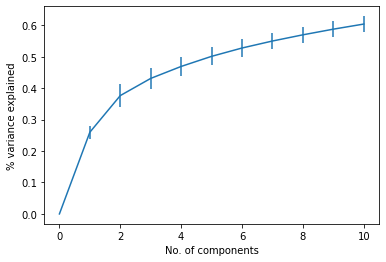

(array([0.        , 0.2599438 , 0.37654344, 0.43117168, 0.46926133,
        0.50140464, 0.52790446, 0.55017172, 0.56987476, 0.58786592,
        0.60410887]),
 array([0.        , 0.02032973, 0.03688219, 0.03267426, 0.03102799,
        0.02870632, 0.02835356, 0.02692952, 0.02622666, 0.02556893,
        0.02486283]))

In [3]:
make_pca_variance_plot(xor_results, 400, save=False, experiment="xor")

With heritability=0.4

In [11]:
n = 500
rep_choice = 1
print(xor_results[n][rep_choice]["pca_results"])
tmp = xor_results[n][rep_choice]['pca_results']['lasso_coef']
np.nonzero(tmp.to_numpy())[0]

   pca_var_exp  corr_with_base_feat  corr_with_target  y_var_explained  \
0     0.225801            -0.926554          0.003516         0.007399   
1     0.088631            -0.112982          0.527982         0.059683   
2     0.073541            -0.075553         -0.723033         0.134827   
3     0.055581             0.118829          0.055668         0.004304   
4     0.032652             0.144396         -0.009251         0.004832   
5     0.025539             0.163395          0.110065         0.000314   
6     0.019315            -0.052256         -0.018593         0.000494   
7     0.017960             0.007857          0.076043         0.000263   
8     0.017429            -0.093298         -0.034339         0.004943   
9     0.013917             0.093892          0.036112         0.000007   

   y_var_exp_norm  t-statistic  lasso_coef  ols_coef  
0        0.000627     1.489900    0.000000  0.021328  
1        0.350391     4.421997    0.110413  0.099235  
2        0.529590   

array([1, 2], dtype=int64)

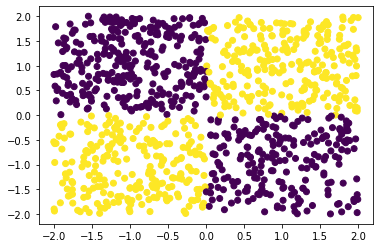

In [117]:
X = np.random.uniform(-2, 2, (1000, p))
plt.scatter(X[:,0], X[:,1], c=xor(X, sigma=0, beta=1))

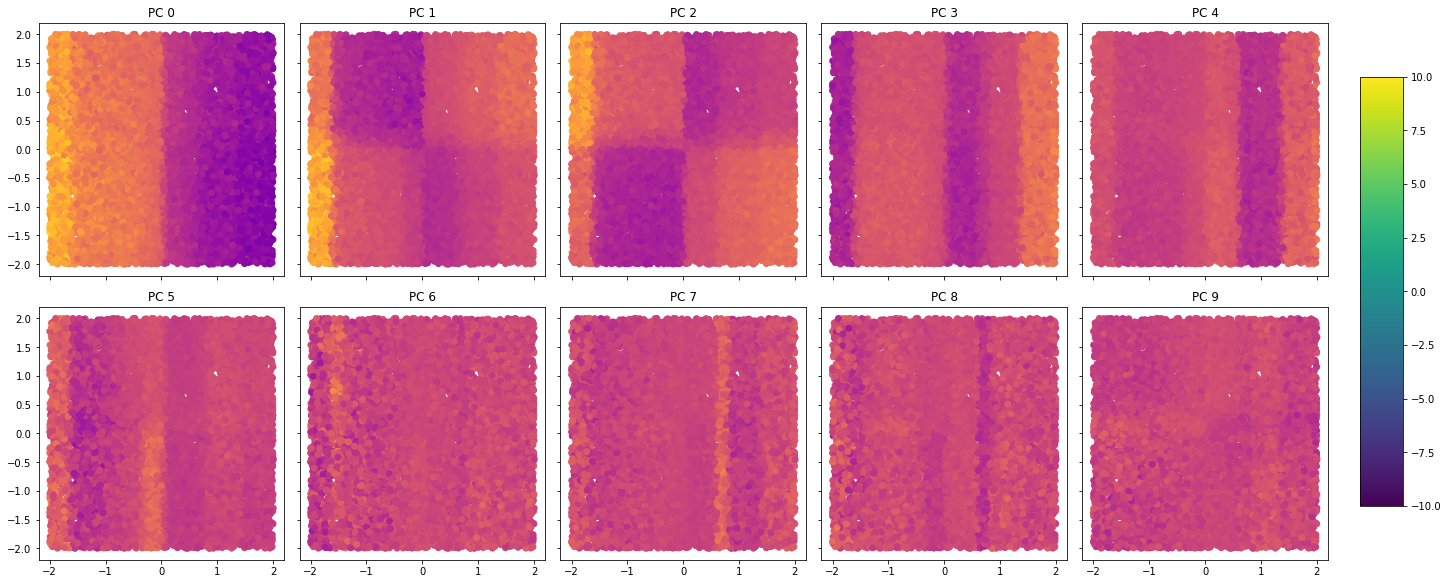

In [4]:
X = np.random.uniform(-2, 2, (10000, p))
make_2d_plot(xor_results[n][rep_choice]["tree_transformer"], X, c_plotted=10, save=False, experiment="xor")

In [12]:
#X
pd.DataFrame(X).to_csv("results2/X.csv")
# XOR function values
xor_vals = xor(X, sigma=0, beta=1)
pd.DataFrame(xor_vals).to_csv("results2/xor_vals.csv")
# pca results
pd.DataFrame(xor_results[n][rep_choice]["pca_results"]).to_csv("results2/pca_results.csv")
# values for color coding
tmp = np.zeros((10000,10))
for k in range(0,9):
    print(k)
    tmp[:,k] = xor_results[n][rep_choice]["tree_transformer"].transform_one_feature(X, 0)[:,k]
pd.DataFrame(tmp).to_csv("results2/color_code.csv")

0
1
2
3
4
5
6
7
8


In [13]:
n_grid = [100,500]
p = 10
k = 0
params = {"s": 2,
          "sigma": 1,
          "beta": 1,
          "heritability": 0.4}
target_func = lambda Z : Z[:,k] ** 2
ss_results = run_sims(sum_of_squares, n_grid, p, params, k, target_func)

100%|██████████| 2/2 [00:41<00:00, 20.59s/it]


In [26]:
n = 500
rep_choice = 7
print(ss_results[n][rep_choice]["pca_results"])

   pca_var_exp  corr_with_base_feat  corr_with_target  y_var_explained  \
0     0.304520            -0.628182          0.445327         0.004301   
1     0.235339             0.493599          0.771189         0.013211   
2     0.051675            -0.372429          0.029153         0.000282   
3     0.038552            -0.436038          0.313349         0.000017   
4     0.025144             0.333274         -0.045732         0.001922   
5     0.015704            -0.063782          0.303583         0.001212   
6     0.012774             0.067447          0.163034         0.011878   
7     0.012289            -0.097808         -0.239718         0.021239   
8     0.011660            -0.267869         -0.122412         0.000002   
9     0.010694             0.102402         -0.056279         0.000042   

   y_var_exp_norm  t-statistic  lasso_coef  ols_coef  
0        0.200574     1.243584    0.079254  0.052420  
1        0.743799     1.036111    0.158656  0.090986  
2        0.000538   

array([0, 1], dtype=int64)

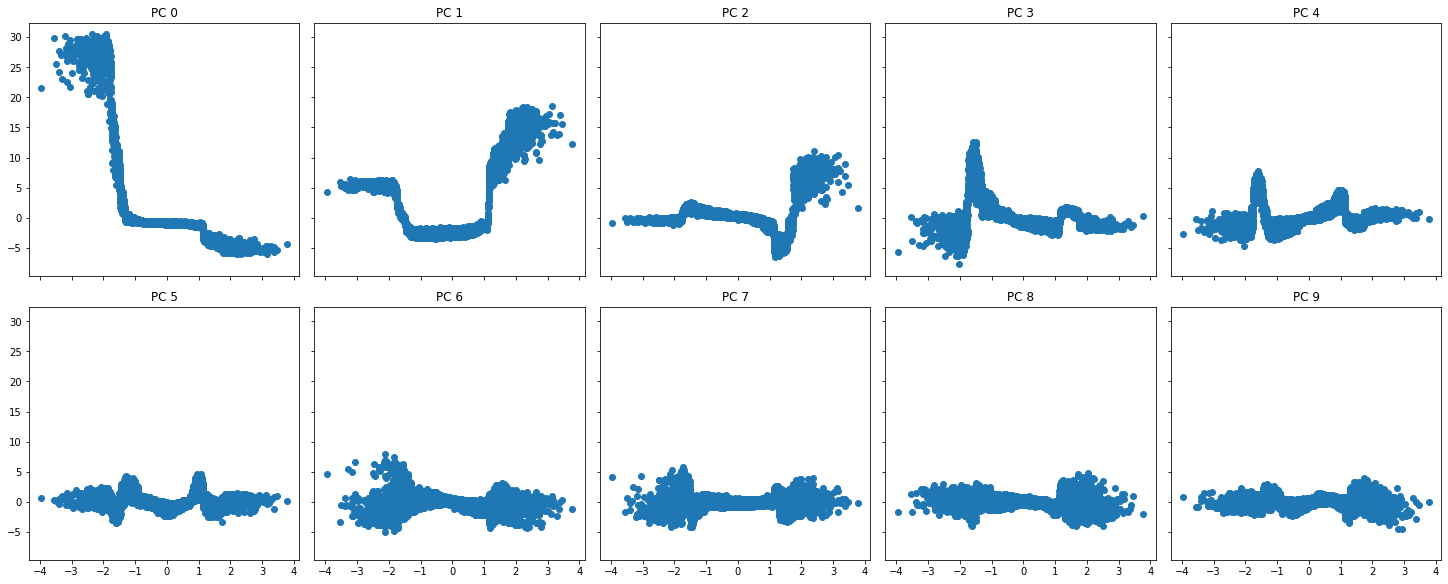

In [29]:
X = np.random.randn(10000, p)
make_plot(ss_results[n][rep_choice]["tree_transformer"], X, c_plotted=10, save=False, experiment="ss")

In [31]:
#X
pd.DataFrame(X).to_csv("results2/ss_0.4_n500_X.csv")
# pca results
pd.DataFrame(ss_results[n][rep_choice]["pca_results"]).to_csv("results2/ss_0.4_n500_pca_results.csv")
# values for color coding
tmp = np.zeros((10000,10))
for k in range(0,9):
    print(k)
    tmp[:,k] = ss_results[n][rep_choice]["tree_transformer"].transform_one_feature(X, 0)[:,k]
pd.DataFrame(tmp).to_csv("results2/ss_0.4_n500_color_code.csv")

0
1
2
3
4
5
6
7
8
